In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [2]:
limit_rows   = 7000000
train           = pd.read_csv("train_ver2.csv",dtype={"sexo":str,
                                                    "ind_nuevo":str,
                                                    "ult_fec_cli_1t":str,
                                                    "indext":str}, nrows=limit_rows)


/var/folders/q2/2f_m0ps1203czxrzbgwn59h80000gn/T/ipykernel_26198/3775245202.py:2: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  train           = pd.read_csv("train_ver2.csv",dtype={"sexo":str,


In [3]:
train.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


## Correlation Matrix - 

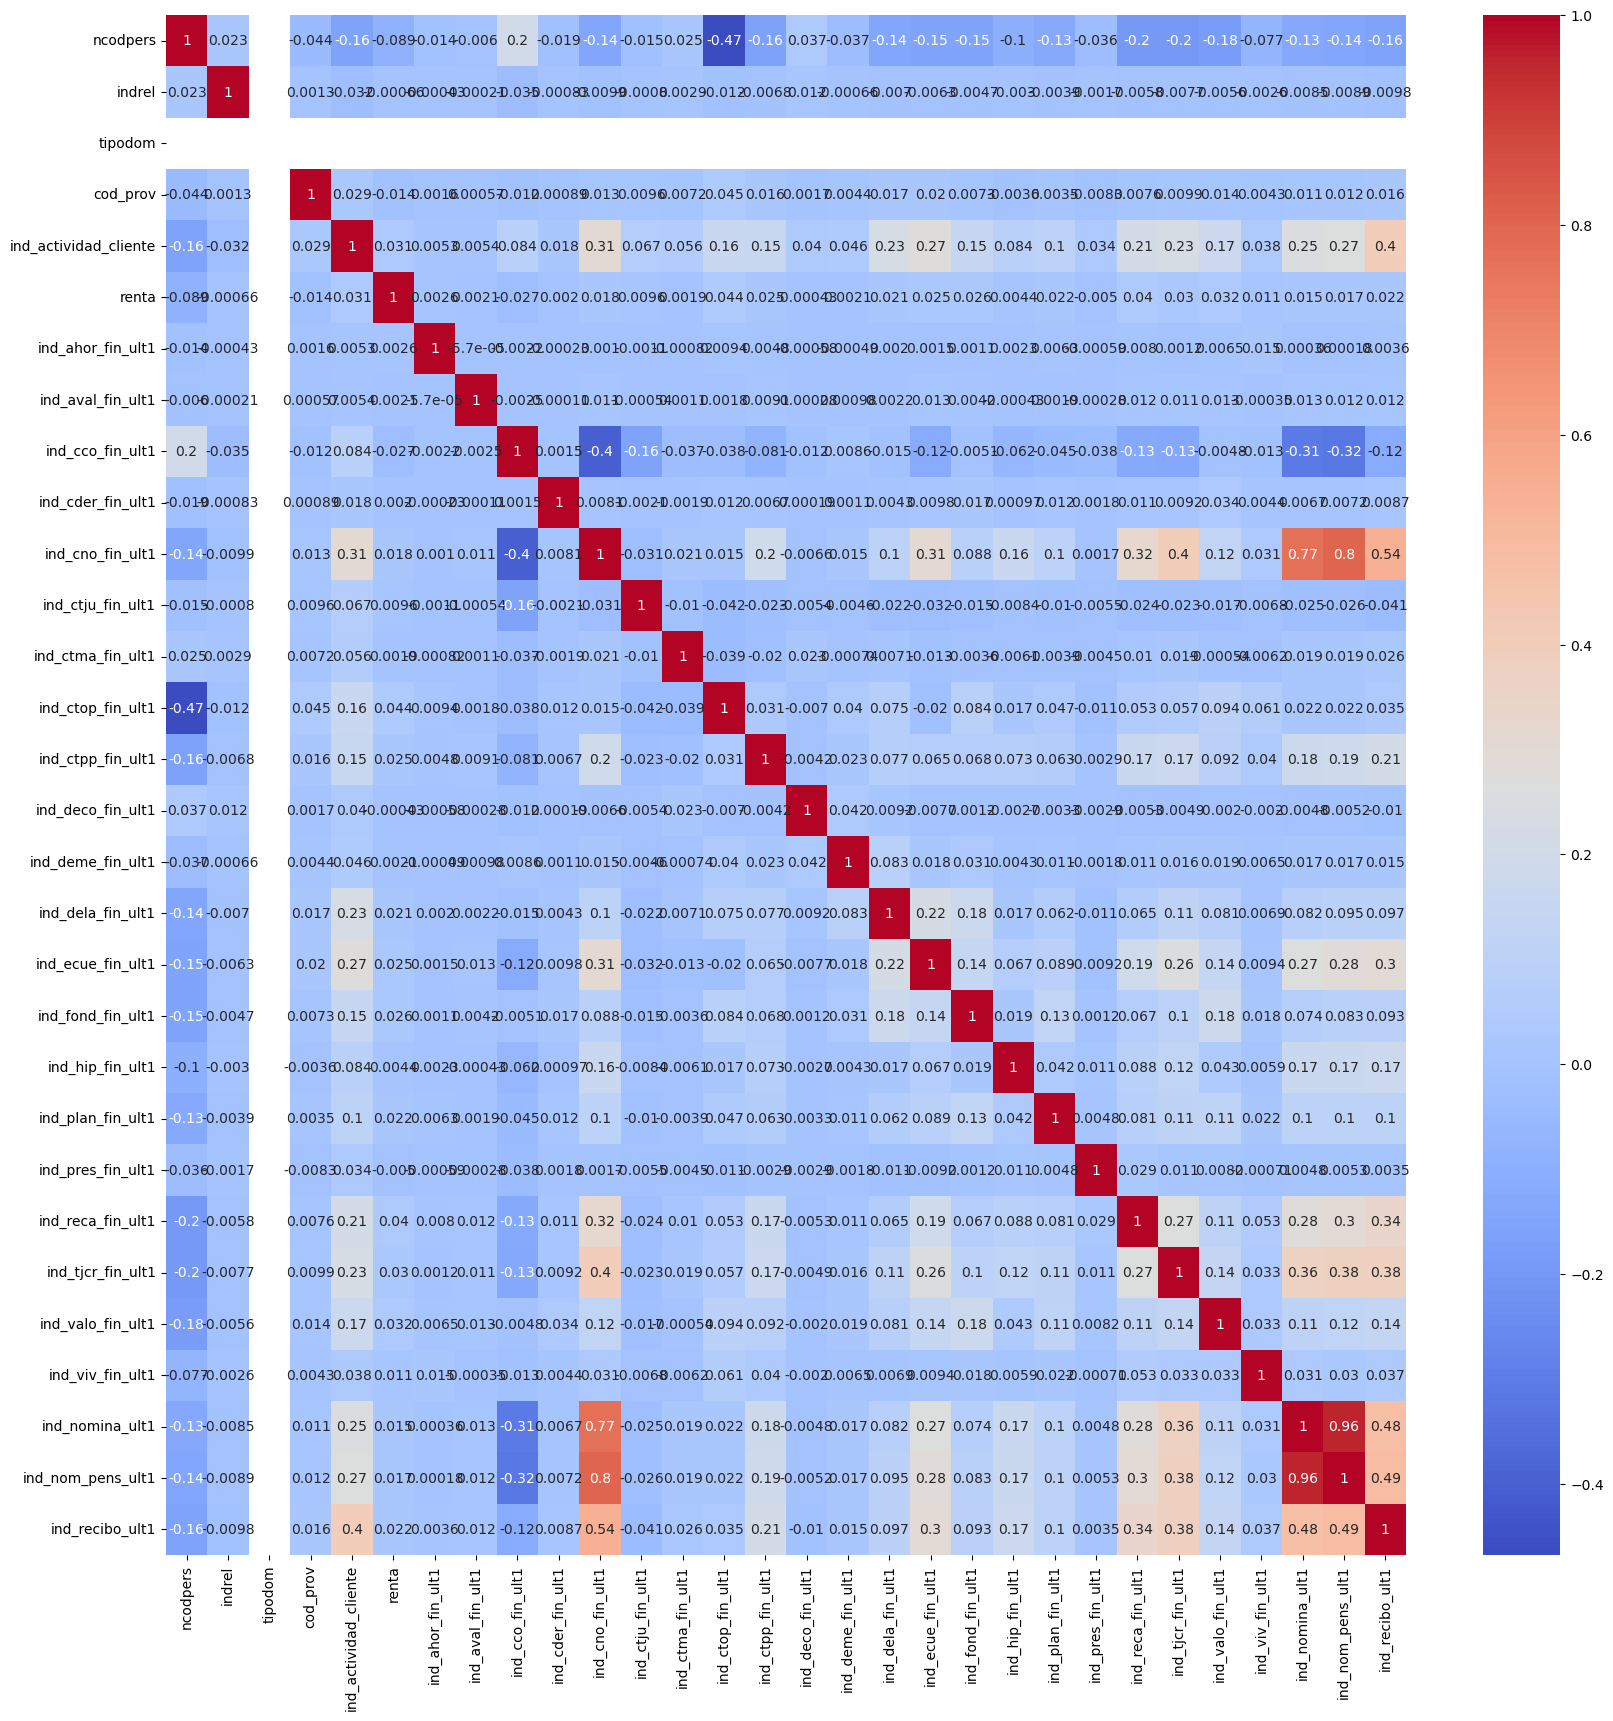

In [4]:
corr_matrix = train.corr()
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [5]:
train = train.drop(['ind_nom_pens_ult1'], axis = 1)

## Convert DataTypes

In [6]:
train["age"]   = pd.to_numeric(train["age"], errors="coerce")
train["antiguedad"]   = pd.to_numeric(train["antiguedad"], errors="coerce")
train["renta"]   = pd.to_numeric(train["renta"], errors="coerce")


## Checking for Missing Values

In [7]:
train.isnull().mean() * 100


fecha_dato                0.000000
ncodpers                  0.000000
ind_empleado              0.396200
pais_residencia           0.396200
sexo                      0.396686
age                       0.396200
fecha_alta                0.396200
ind_nuevo                 0.396200
antiguedad                0.396200
indrel                    0.396200
ult_fec_cli_1t           99.843557
indrel_1mes               1.497200
tiprel_1mes               1.497200
indresi                   0.396200
indext                    0.396200
conyuemp                 99.985743
canal_entrada             1.703600
indfall                   0.396200
tipodom                   0.396200
cod_prov                  0.915571
nomprov                   0.915571
ind_actividad_cliente     0.396200
renta                    17.889371
segmento                  1.718914
ind_ahor_fin_ult1         0.000000
ind_aval_fin_ult1         0.000000
ind_cco_fin_ult1          0.000000
ind_cder_fin_ult1         0.000000
ind_cno_fin_ult1    

In [8]:
train['ind_nuevo'] = train['ind_nuevo'].fillna(1)

median = train['renta'].median()
train['renta'] = train['renta'].fillna(median)

#99%
train.drop(columns=['ult_fec_cli_1t','conyuemp'], inplace=True)
train.drop(columns=['pais_residencia'], inplace=True)

train['ind_nomina_ult1'] = train['ind_nomina_ult1'].fillna(0)

#A is the most frequent category


train = train.dropna(subset = ['indrel_1mes', 'tiprel_1mes' , 'nomprov', 'cod_prov', 'canal_entrada', 'segmento', 'sexo'])


In [9]:
train.isnull().mean() * 100


fecha_dato               0.0
ncodpers                 0.0
ind_empleado             0.0
sexo                     0.0
age                      0.0
fecha_alta               0.0
ind_nuevo                0.0
antiguedad               0.0
indrel                   0.0
indrel_1mes              0.0
tiprel_1mes              0.0
indresi                  0.0
indext                   0.0
canal_entrada            0.0
indfall                  0.0
tipodom                  0.0
cod_prov                 0.0
nomprov                  0.0
ind_actividad_cliente    0.0
renta                    0.0
segmento                 0.0
ind_ahor_fin_ult1        0.0
ind_aval_fin_ult1        0.0
ind_cco_fin_ult1         0.0
ind_cder_fin_ult1        0.0
ind_cno_fin_ult1         0.0
ind_ctju_fin_ult1        0.0
ind_ctma_fin_ult1        0.0
ind_ctop_fin_ult1        0.0
ind_ctpp_fin_ult1        0.0
ind_deco_fin_ult1        0.0
ind_deme_fin_ult1        0.0
ind_dela_fin_ult1        0.0
ind_ecue_fin_ult1        0.0
ind_fond_fin_u

### Cateogorical Encoding of Variables

In [10]:
#Cateorgical encoding: 
le = LabelEncoder()
train_mask = ~train['sexo'].isnull()
train.loc[train_mask, 'sexo'] = le.fit_transform(train['sexo'][train_mask])

le = LabelEncoder()
train_mask = ~train['canal_entrada'].isnull()
train.loc[train_mask, 'canal_entrada'] = le.fit_transform(train['canal_entrada'][train_mask])

le = LabelEncoder()
train_mask = ~train['segmento'].isnull()
train.loc[train_mask, 'segmento'] = le.fit_transform(train['segmento'][train_mask])

le = LabelEncoder()
train_mask = ~train['cod_prov'].isnull()
train.loc[train_mask, 'cod_prov'] = le.fit_transform(train['cod_prov'][train_mask])

# print(train.dtypes)
# ['canal_entrada','cod_prov','segmento']

## Graphs and distribution

### Visualising the distribution of each product by age by boxplot¶


/Users/sanmatichoudhary/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='train age'>

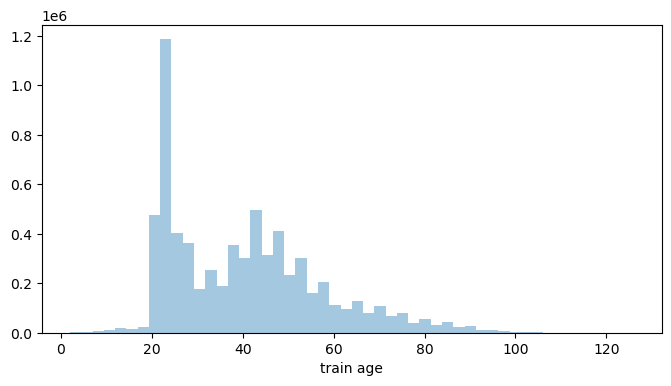

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,4))

sns.distplot(train.age[(train.age>=0) & (train.age<=130)], kde=False, ax=axes, axlabel='train age')


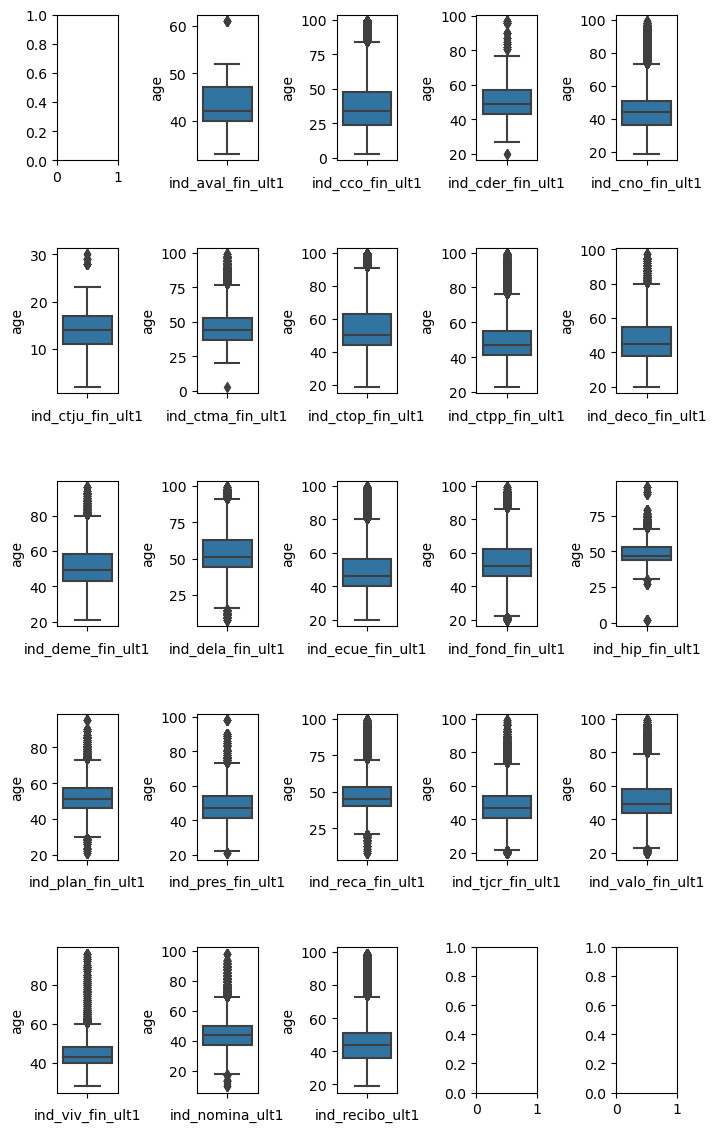

In [16]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(8,14))
plt.subplots_adjust(wspace=1.3, hspace=0.6)
fig_row=0
for col_id in range(22, 44):
    ax_id=col_id-22
    fig_label=train.columns[col_id]
    feat=train.columns[col_id]
    fig_col=(col_id-1)%5
    box_plot=sns.boxplot(y='age', data=train[(train[feat]==1) & 
                                             (train['age']>0) & (train['age']<100)], ax=axes[fig_row][fig_col])
    box_plot.set(xlabel=fig_label)
    if fig_col==4: fig_row+=1

### Distribution of product by Cod_prov¶


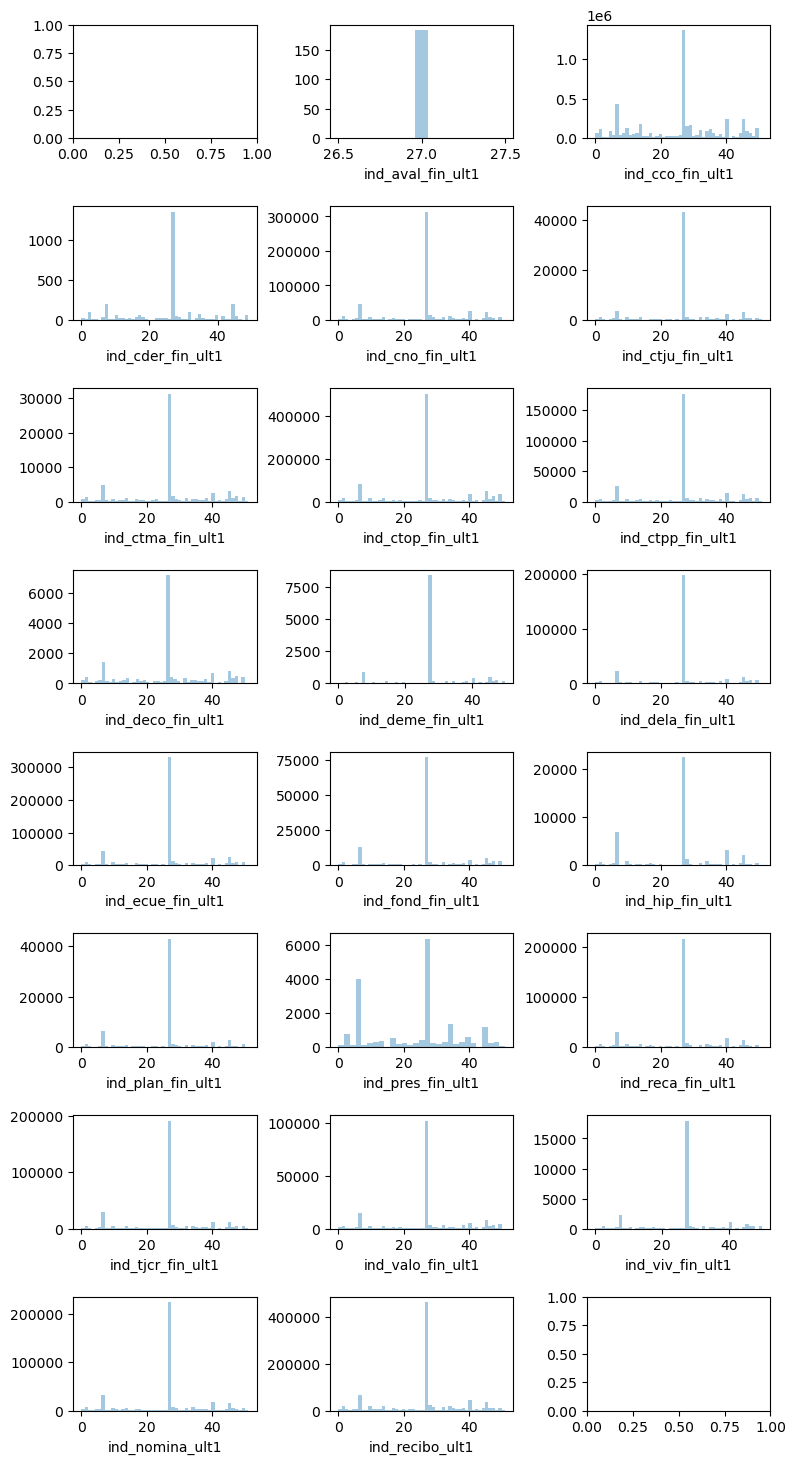

In [18]:
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(9,18))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
fig_row=0
for col_id in range(22, 44):
    ax_id=col_id-22
    fig_label= train.columns[col_id]
    feat=train.columns[col_id]
    fig_col=col_id%3
    sns.distplot(train.cod_prov[(train[feat]==1) & (train['cod_prov']>=0)], kde=False, 
                 axlabel=fig_label, ax=axes[fig_row][fig_col])
    if fig_col==2: fig_row+=1

### Distribution of product among different genders¶


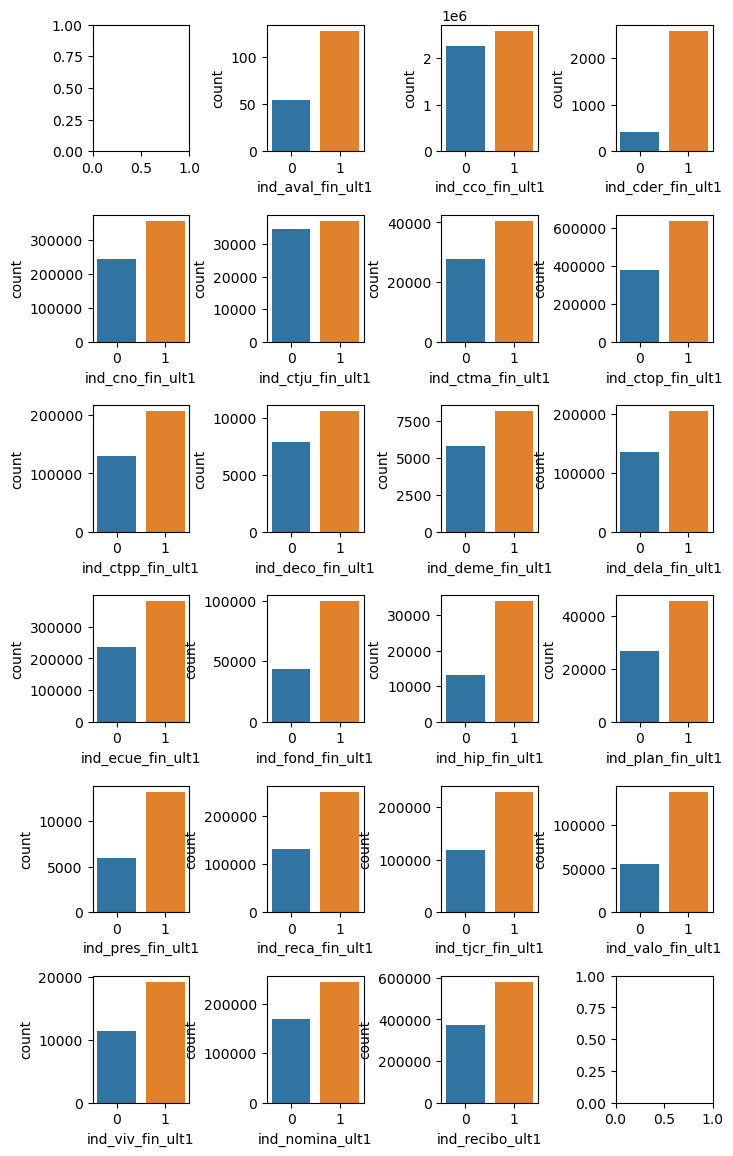

In [19]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(8,14))
plt.subplots_adjust(wspace=0.8, hspace=0.5)
# fig.tight_layout()
fig_row=0
for col_id in range(22, 44):
    ax_id=col_id-22
    fig_label= train.columns[col_id]
    feat=train.columns[col_id]
    fig_col=(col_id-1)%4
    countplot=sns.countplot(x='sexo', data=train[(train[feat]==1) & (train['sexo']>=0)],ax=axes[fig_row][fig_col])
    countplot.set(xlabel=fig_label)
    if fig_col==3: fig_row+=1

### Transform Test Data

In [32]:
limit_rows   = 7000000

test = pd.read_csv("train_ver2.csv",dtype={"sexo":str,
                                             "ind_nuevo":str,
                                               "ult_fec_cli_1t":str,
                                                "indext":str}, nrows=limit_rows)

/var/folders/q2/2f_m0ps1203czxrzbgwn59h80000gn/T/ipykernel_26198/316285499.py:3: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv("test_ver2.csv",dtype={"sexo":str,


In [33]:
test = test.drop(['ind_nom_pens_ult1'], axis = 1)

In [34]:
test["age"]   = pd.to_numeric(test["age"], errors="coerce")
test["antiguedad"]   = pd.to_numeric(test["antiguedad"], errors="coerce")
test["renta"]   = pd.to_numeric(test["renta"], errors="coerce")


In [36]:
test['ind_nuevo'] = test['ind_nuevo'].fillna(1)

median = test['renta'].median()
test['renta'] = test['renta'].fillna(median)

#99%
test.drop(columns=['ult_fec_cli_1t','conyuemp'], inplace=True)
test.drop(columns=['pais_residencia'], inplace=True)

test['ind_nomina_ult1'] = test['ind_nomina_ult1'].fillna(0)

#A is the most frequent category


test = test.dropna(subset = ['indrel_1mes', 'tiprel_1mes' , 'nomprov', 'cod_prov', 'canal_entrada', 'segmento', 'sexo'])


In [37]:
test.isnull().mean() * 100


fecha_dato               0.0
ncodpers                 0.0
ind_empleado             0.0
sexo                     0.0
age                      0.0
fecha_alta               0.0
ind_nuevo                0.0
antiguedad               0.0
indrel                   0.0
indrel_1mes              0.0
tiprel_1mes              0.0
indresi                  0.0
indext                   0.0
canal_entrada            0.0
indfall                  0.0
tipodom                  0.0
cod_prov                 0.0
nomprov                  0.0
ind_actividad_cliente    0.0
renta                    0.0
segmento                 0.0
ind_ahor_fin_ult1        0.0
ind_aval_fin_ult1        0.0
ind_cco_fin_ult1         0.0
ind_cder_fin_ult1        0.0
ind_cno_fin_ult1         0.0
ind_ctju_fin_ult1        0.0
ind_ctma_fin_ult1        0.0
ind_ctop_fin_ult1        0.0
ind_ctpp_fin_ult1        0.0
ind_deco_fin_ult1        0.0
ind_deme_fin_ult1        0.0
ind_dela_fin_ult1        0.0
ind_ecue_fin_ult1        0.0
ind_fond_fin_u

In [39]:
le = LabelEncoder()
test_mask = ~test['sexo'].isnull()
test.loc[test_mask, 'sexo'] = le.fit_transform(test['sexo'][test_mask])

le = LabelEncoder()
test_mask = ~test['canal_entrada'].isnull()
test.loc[test_mask, 'canal_entrada'] = le.fit_transform(test['canal_entrada'][test_mask])

le = LabelEncoder()
test_mask = ~test['segmento'].isnull()
test.loc[test_mask, 'segmento'] = le.fit_transform(test['segmento'][test_mask])

le = LabelEncoder()
test_mask = ~test['cod_prov'].isnull()
test.loc[test_mask, 'cod_prov'] = le.fit_transform(test['cod_prov'][test_mask])

In [ ]:
#Get rid of the ages 30 and 40 - stratify 

In [ ]:
#todo - fix the test data 


In [ ]:
#map to english transaltion